<b><font color= blue size =4>Lead Scoring - Case Study</font></b><br>
by
- Manjunath V Kannavalli
- Vaibhav Sahal
- Juber Nagani

<b><font color = green>Problem Statement</font></b><br>
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<b><font color = green>Goals of Case Study</font></b><br>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


<b><font color= blue size =4>Step 1 : Importing Libraries and Data</font></b>

In [1]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing library for splitting dataset
from sklearn.model_selection import train_test_split

#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

# importing necessary library
import statsmodels.api as sm

#importing Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#for checking the VIF values of features
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for calculating metrics like accuracy, specificity, sensitivity, false positive rate, positive predictive value, negative predictive value
from sklearn import metrics

#for calculating confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score

# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

<b><font color= blue size =4>Step 2: Inspecting the Dataframe </font></b>

In [2]:
#importing dataset csv in a dataframe

leads_df=pd.read_csv("/Users/manjunathkannavalli/Downloads/upGrad Data Science/Course 2 Machine learning/Lead Scoring case study/Lead Scoring Assignment/Leads.csv")

In [3]:
#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Let's check the dimesions of the dataframe
leads_df.shape

(9240, 37)

The 'Leads.csv' dataset contains 9240 observations and 37 features.

In [5]:
#Statstical aspects of the dataframe
leads_df.describe().round(4)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


In [6]:
#check the datatype in each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

 Here, we can see the presence of few categorical values for which we have to create dummy variables. Also, presence of null values can be observed thus, we have to treat them accordingly in further steps

In [7]:
#check for duplicates
print(sum(leads_df.duplicated(subset = 'Prospect ID')) == 0)
print(sum(leads_df.duplicated(subset = 'Lead Number')) == 0)

True
True


sum(leads.duplicated(subset = 'Prospect ID')) counts the number of duplicate rows in the DataFrame. Since True evaluates to 1 and False evaluates to 0 in Python, summing the boolean Series will give us the count of duplicate rows.

== 0 checks if the count of duplicate rows is equal to 0, which means that there are no duplicates in the DataFrame.

So, the entire expression returns a boolean value True if there are no duplicate rows in the DataFrame, and False otherwise.

#### So, there are no duplicate values in 'Prospect ID' and 'Lead Number'

'Prospect ID' and 'Lead Number' are just an ID number which doesn't serve in the analysis. Hence, we can drop those columns

## <font color=purple>Exploratory Data Analysis</font>

# <b><font color= blue size =4>Step 3: Data Cleaning</font></b>

<b><font color= green size =3>3.1 Identifying Missing Values</font></b>

In [8]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

As can be seen,there are few columns like Lead Profile and City with level called 'Select' which indicates that the option is not selected for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to Nan

In [9]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [10]:
#Checking for count of missing values in each column
leads_df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Co

In [11]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

As we can see there are many columns with high percentage of null values, we will drop them as they are not useful

<b><font color= green size =3>3.2 Dropping Columns with Missing Values >=40%</font></b>

In [12]:
#Drop all the columns with more than 40% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, 1, inplace = True)

In [13]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

<b><font color= green size =3>3.3 Columns with categorical data </font></b>

In [14]:
# Select the columns with non-numeric data type
categorical_cols = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


<strong><span style="color:blue">NOTE:</span></strong> Approach would be to check the count of values in each categorical column and then decide how to treat the missing values for that particular column

In [15]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*leads_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(round(perc,4),"\n")
        print("---"*40,"\n")

value_counts % for : City 

Mumbai                         57.8352
Thane & Outskirts              13.4985
Other Cities                   12.3138
Other Cities of Maharashtra     8.2032
Other Metro Cities              6.8210
Tier II Cities                  1.3283
Name: City, dtype: float64 

------------------------------------------------------------------------------------------------------------------------ 

value_counts % for : Specialization 

Finance Management                   16.6553
Human Resource Management            14.4710
Marketing Management                 14.3003
Operations Management                 8.5836
Business Administration               6.8771
IT Projects Management                6.2457
Supply Chain Management               5.9556
Banking, Investment And Insurance     5.7679
Travel and Tourism                    3.4642
Media and Advertising                 3.4642
International Business                3.0375
Healthcare Management                 2.7133
Hospital

#### Insights:
- <strong><span style="color:maroon">City:</span></strong> City has 39.71 % missing values. Imputing missing values with most frequent value, Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence `City column can be dropped`. 

- <strong><span style="color:maroon">Tags:</span></strong> Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will `not be useful for modeling`. Hence it can be `dropped`.

- <strong><span style="color:maroon">What matters most to you in choosing a course:</span></strong> This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will `not provide any insight`.

- <strong><span style="color:maroon">Country:</span></strong> X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

- <strong><span style="color:blue">Specialization:</span></strong> Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called `'Others'`. 

- <strong><span style="color:blue">What is your current occupation:</span></strong> We can impute the missing values with `'Unemployed'` as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

- <strong><span style="color:blue">Last Activity:</span></strong> `"Email Opened"` is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label `'Email Opened'`.

- <strong><span style="color:blue">Lead Source:</span></strong> `"Google"` is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

<hr>


In [16]:
# Dropping Columns
print("Before Drop",leads_df.shape)
leads_df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",leads_df.shape)

Before Drop (9240, 28)
After Drop (9240, 24)


In [17]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
leads_df=leads_df.fillna(value=missing_values)

In [18]:
# Re Checking the percentage of null values for remaining columns

round(((leads_df.isnull().sum()/leads_df.shape[0])*100),4).sort_values(ascending=False)

TotalVisits                                 1.4827
Page Views Per Visit                        1.4827
Lead Origin                                 0.0000
Newspaper Article                           0.0000
A free copy of Mastering The Interview      0.0000
I agree to pay the amount through cheque    0.0000
Get updates on DM Content                   0.0000
Update me on Supply Chain Content           0.0000
Receive More Updates About Our Courses      0.0000
Through Recommendations                     0.0000
Digital Advertisement                       0.0000
Newspaper                                   0.0000
X Education Forums                          0.0000
Magazine                                    0.0000
Lead Source                                 0.0000
Search                                      0.0000
What is your current occupation             0.0000
Specialization                              0.0000
Last Activity                               0.0000
Total Time Spent on Website    

<b><font color= green size =3>3.4 Columns with Numerical data </font></b>

In [19]:
# TotalVisits
print("TotalVisits - Value Counts")
print("---"*30)
leads_df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
------------------------------------------------------------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [20]:
# TotalVisits missing values to be imputed with mode
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].mode()[0], inplace=True)

In [21]:
# Page views per visit
print("Page views per visit - Value Counts")
print("---"*30)
leads_df.TotalVisits.value_counts().head(10)

Page views per visit - Value Counts
------------------------------------------------------------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [22]:
# Page Views Per Visit missing values to be imputed with mode
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mode()[0], inplace=True)

In [23]:
leads_df['Page Views Per Visit'].value_counts().head(10)

0.0    2326
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

Re-checking the null values for columns

In [24]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((leads_df.isnull().sum()/leads_df.shape[0])*100),4).sort_values(ascending=False)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

<b><font color= green size =3>3.5 Removing Unwanted Columns </font></b>

In [25]:
# Last Notable Activity
print("Last Notable Activity")
print("---"*30)
round(100*leads_df['Last Notable Activity'].value_counts(normalize=True),4)

Last Notable Activity
------------------------------------------------------------------------------------------


Modified                        36.8723
Email Opened                    30.5952
SMS Sent                        23.5065
Page Visited on Website          3.4416
Olark Chat Conversation          1.9805
Email Link Clicked               1.8723
Email Bounced                    0.6494
Unsubscribed                     0.5087
Unreachable                      0.3463
Had a Phone Conversation         0.1515
Email Marked Spam                0.0216
Approached upfront               0.0108
Resubscribed to emails           0.0108
View in browser link Clicked     0.0108
Form Submitted on Website        0.0108
Email Received                   0.0108
Name: Last Notable Activity, dtype: float64

<font color= green size =3>3.5.1 Handling columns with only 1 unique value </font>

In [26]:
#check for columns with one unique value, count, and frequency are same

leads_df.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


<strong><span style="color:blue">NOTE:</span></strong> Following columns have only **`one unique value`**: 
- 'Magazine',
- 'Receive More Updates About Our Courses', 
- 'Update me on Supply Chain Content', 
- 'Get updates on DM Content', 
- 'I agree to pay the amount through cheque'

These columns are of no use as they have only one category of response from customer and can be <strong><span style="color:maroon">dropped:</span></strong>

In [27]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",leads_df.shape)
leads_df.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",leads_df.shape)

Before Dropping Columns (9240, 24)
After Dropping Columns (9240, 19)


<font color= green size =3>3.5.2 Dropping column 'Last Notable Activity' </font>

In [28]:
# Dropping Columns
print("Before Dropping Columns",leads_df.shape)
leads_df.drop(['Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",leads_df.shape)

Before Dropping Columns (9240, 19)
After Dropping Columns (9240, 18)


In [29]:
# get the percentage of missing values in each row

100*(leads_df.isna().mean(axis=1)).sort_values(ascending=False).head()

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
dtype: float64

No missing values in rows

<b><font color= green size =3>3.6 Checking and dropping skewed categorical columns </font></b>

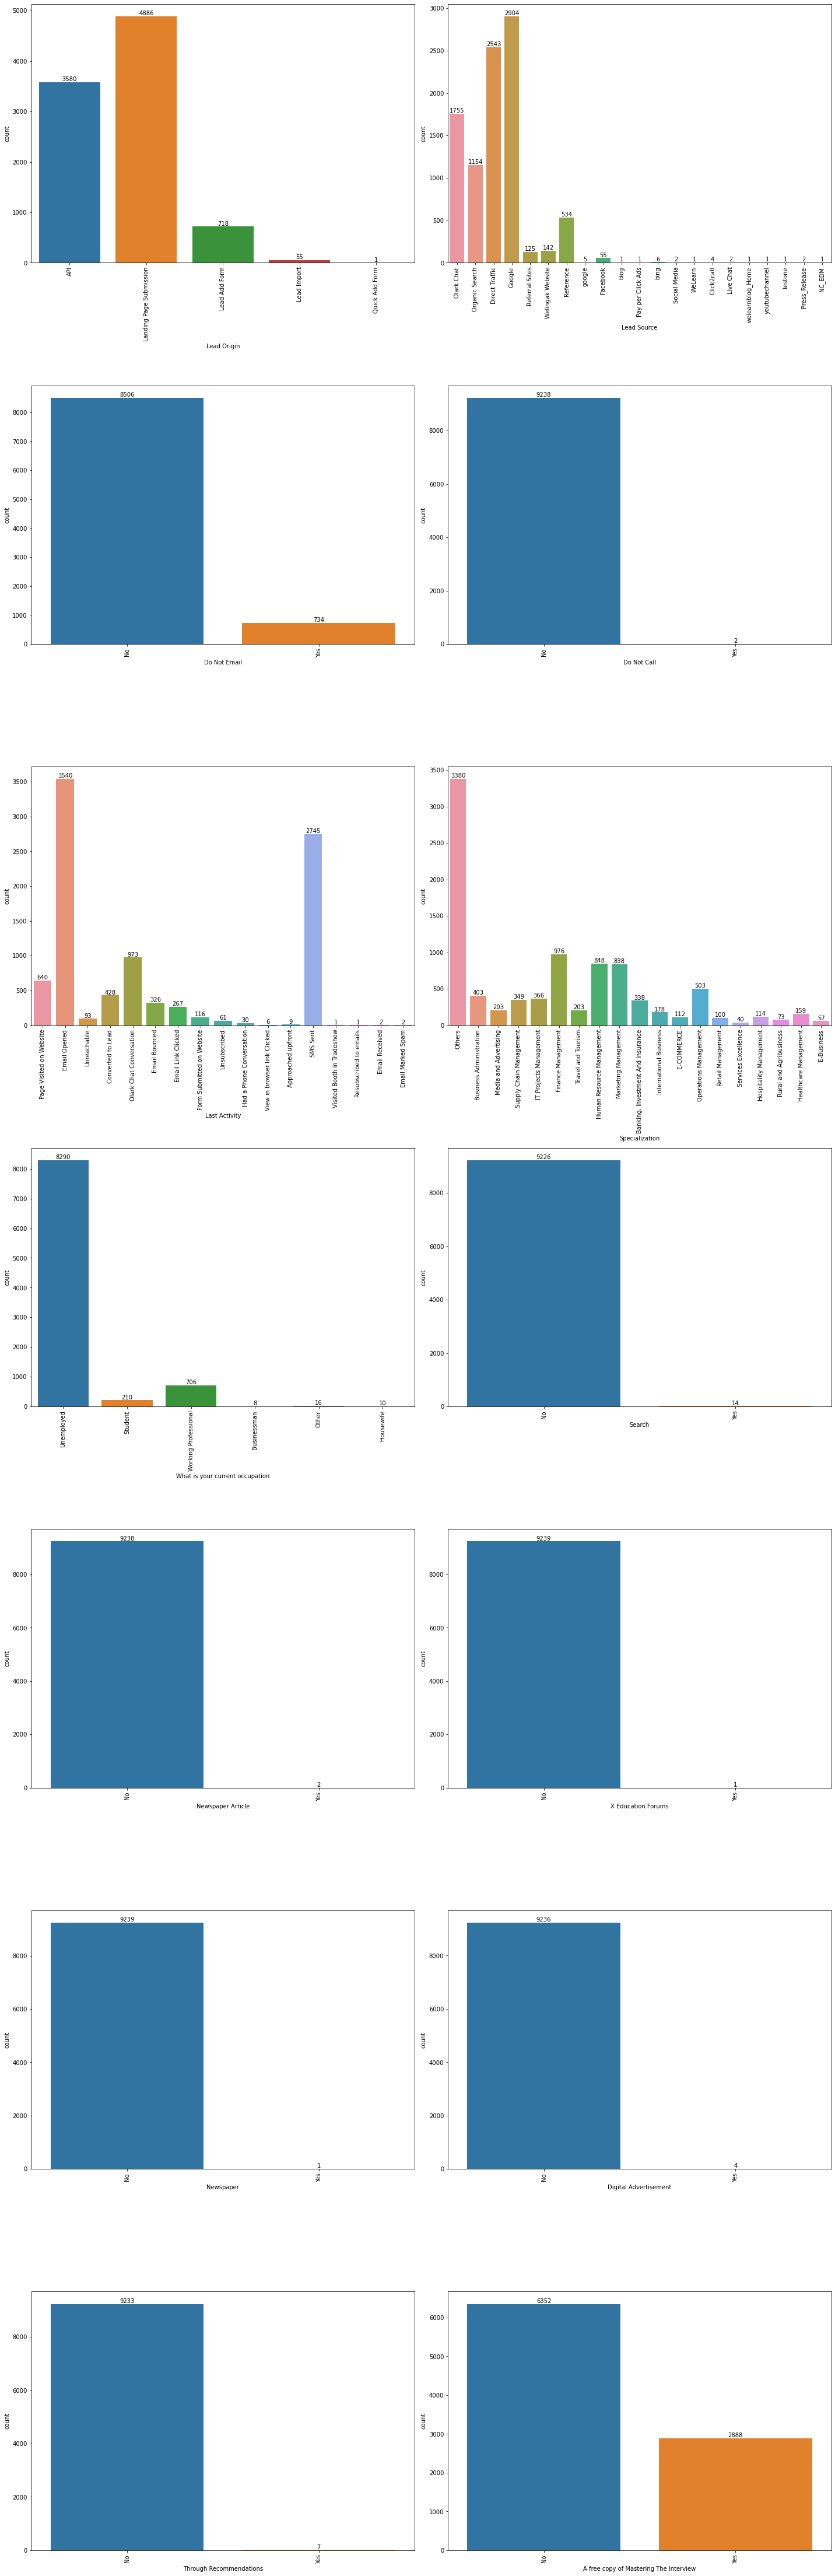

In [30]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20,70))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leads_df) 
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        plt.tight_layout()
plt.show()

<strong><span style="color:blue">NOTE:</span></strong> Following columns have data which is `highly skewed` :
- 'Do Not Call',
- 'Search', 
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper', 
- 'Digital Advertisement',
- 'Through Recommendations'. 

Hence these columns will be `dropped` as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can `lead to biased` or `inaccurate parameter estimates`.

In [31]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",leads_df.shape)
leads_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",leads_df.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [32]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


After data is cleaned lets standardise values 

<b><font color= green size =3>3.7 Outlier Analysis </font></b>

<font color= green size =3>3.7.1 Numerical Columns </font>

In [33]:
def check_outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = leads_df[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="black")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

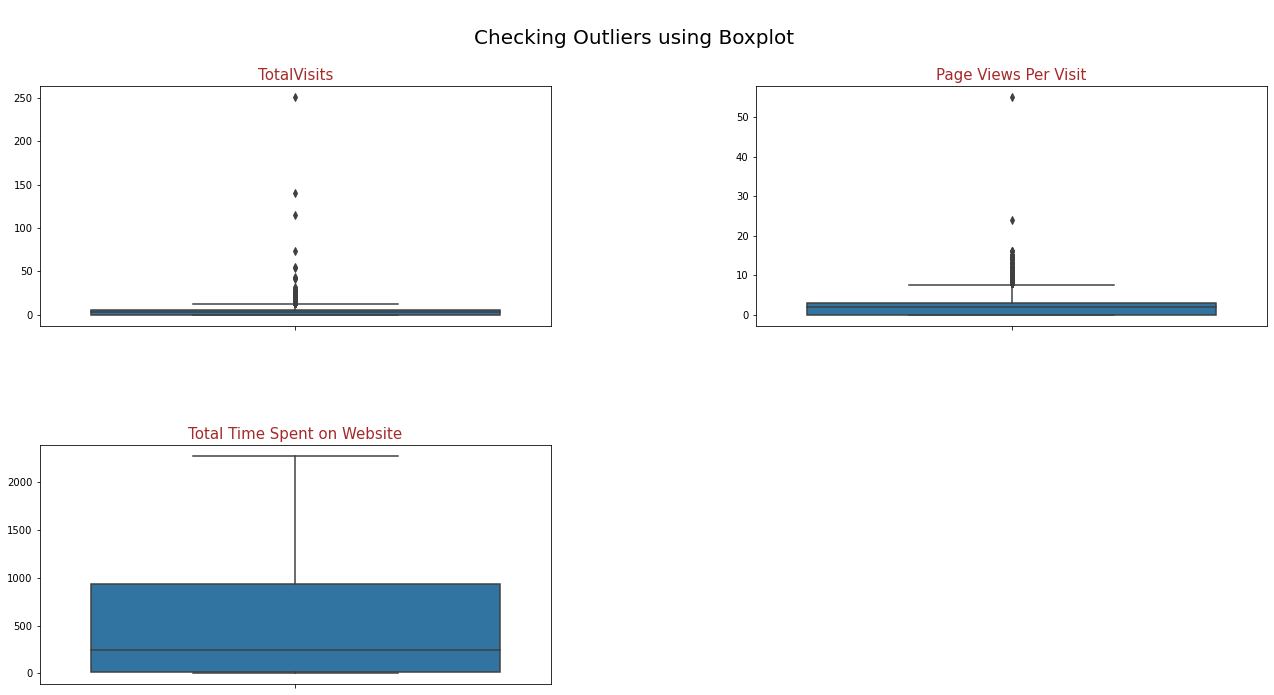

In [34]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
check_outliers(leads_df,num_cols)

`"TotalVisits"`,`"Page Views Per Visit"`:Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

<font color= green size =3>3.7.2 Outlier treatment </font>

In [35]:
# before outlier treatment
round(leads_df.describe(percentiles=[.10,.25,.50,.75,.95]),4)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.0000,9240.0000,9240.0000,9240.0000
mean,0.3854,3.3942,487.6983,2.3278
std,0.4867,4.8367,548.0215,2.1643
min,0.0000,0.0000,0.0000,0.0000
10%,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,12.0000,0.0000
50%,0.0000,3.0000,248.0000,2.0000
75%,1.0000,5.0000,936.0000,3.0000
95%,1.0000,10.0000,1562.0000,6.0000
max,1.0000,251.0000,2272.0000,55.0000


In [36]:
# Defining UDF to treat outliers via capping and flooring

def outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [37]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
outlier_treatment(leads_df,capping_cols)

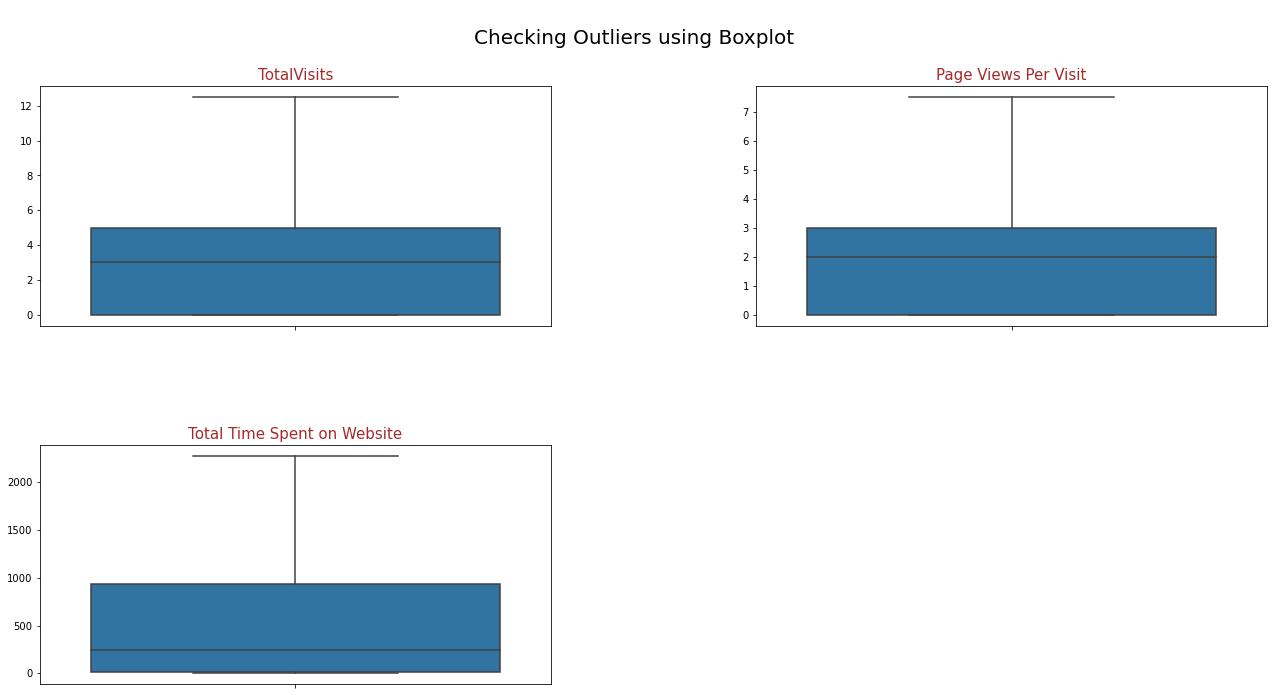

In [38]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
check_outliers(leads_df,num_cols)

In [39]:
# after outlier treatment detailed percentile values
round(leads_df.describe(percentiles=[.10,.25,.50,.75,.95]),4)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.0000,9240.0000,9240.0000,9240.0000
mean,0.3854,3.2139,487.6983,2.2750
std,0.4867,3.0051,548.0215,1.9178
min,0.0000,0.0000,0.0000,0.0000
10%,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,12.0000,0.0000
50%,0.0000,3.0000,248.0000,2.0000
75%,1.0000,5.0000,936.0000,3.0000
95%,1.0000,10.0000,1562.0000,6.0000
max,1.0000,12.5000,2272.0000,7.5000


<b><font color= green size =3>3.8 Checking invalid values and standardising Data </font></b>

- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns

In [40]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [41]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*leads_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(round(perc,4),"\n")
        print("---"*30,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.8788
API                        38.7446
Lead Add Form               7.7706
Lead Import                 0.5952
Quick Add Form              0.0108
Name: Lead Origin, dtype: float64 

------------------------------------------------------------------------------------------ 

value_counts % for : Lead Source 

Google               31.4286
Direct Traffic       27.5216
Olark Chat           18.9935
Organic Search       12.4892
Reference             5.7792
Welingak Website      1.5368
Referral Sites        1.3528
Facebook              0.5952
bing                  0.0649
google                0.0541
Click2call            0.0433
Press_Release         0.0216
Social Media          0.0216
Live Chat             0.0216
youtubechannel        0.0108
testone               0.0108
Pay per Click Ads     0.0108
welearnblog_Home      0.0108
WeLearn               0.0108
blog                  0.0108
NC_EDM                0.0108
Name: Lead Source

<strong><span style="color:blue">NOTE:</span></strong> 

- We've noticed that some categories/levels in the `"Lead Score" and "Last Activity"` columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

- Also we can see `"Google"` & `"google"` are same in `"Lead Source"`, so we will standardise the case.

<font color= green size =3>3.8.1 Grouping less frequent values </font>

In [42]:
# Grouping low frequency value levels to Others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace("google","Google")

In [43]:
# value_counts percentage after replace
round(leads_df["Lead Source"].value_counts(normalize=True)*100,4)

Google              31.4827
Direct Traffic      27.5216
Olark Chat          18.9935
Organic Search      12.4892
Reference            5.7792
Welingak Website     1.5368
Referral Sites       1.3528
Facebook             0.5952
Others               0.2489
Name: Lead Source, dtype: float64

In [44]:
# Grouping low frequency value levels to Others 
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [45]:
# value_counts percentage after replace
round(leads_df['Last Activity'].value_counts(normalize=True)*100,4)

Email Opened                 38.3117
SMS Sent                     29.7078
Olark Chat Conversation      10.5303
Page Visited on Website       6.9264
Converted to Lead             4.6320
Email Bounced                 3.5281
Email Link Clicked            2.8896
Others                        2.2186
Form Submitted on Website     1.2554
Name: Last Activity, dtype: float64

In [46]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
leads_df.rename(columns={'A free copy of Mastering The Interview': 'free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
leads_df.rename(columns={'What is your current occupation': 'current_occupation'}, inplace=True)


 `Do Not Email` & `Free_copy` both are binary categorical columns lets map both of them to 1/0

<font color= green size =3>3.8.2 Mapping binary category variables </font>

In [47]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads_df['Do Not Email'] = leads_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads_df['free_copy'] = leads_df['free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

<font color= green size =3>3.8.3 Checking data types </font>

In [48]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   current_occupation           9240 non-null   object 
 10  free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


<strong><span style="color:blue">NOTE:</span></strong> The data types appear to be suitable and no modifications are necessary.

<b><font color= blue size =4>Step 4: Data Analysis</font></b>

<b><font color= green size =3>4.1 Checking data imbalance </font></b>

- Data is imbalanced when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
- Data imbalance is in the context of Target variable only
- `Target variable` is `Converted` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted 

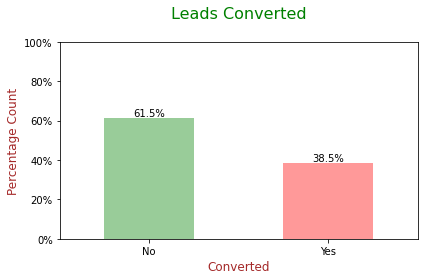

In [49]:
## ploting the results on bar plot

ax=(100*leads_df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.tight_layout()
plt.show()

<strong><span style="color:purple">Insights:</span></strong> 
- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

In [50]:
# Ratio of Data Imbalance
ratio=(leads_df["Converted"].value_counts(normalize=True).loc[0])/(leads_df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


<b><font color= green size =3>4.2 Univariate Analysis </font></b>

In [51]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_occupation,free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


<font color= green size =3>4.2.1 Univariate Analysis for categorical variables </font>

In [52]:
#List of categorical columns
cat_cols = ["Lead Origin","current_occupation","Do Not Email",
            "free_copy","Lead Source","Last Activity","Specialization"]

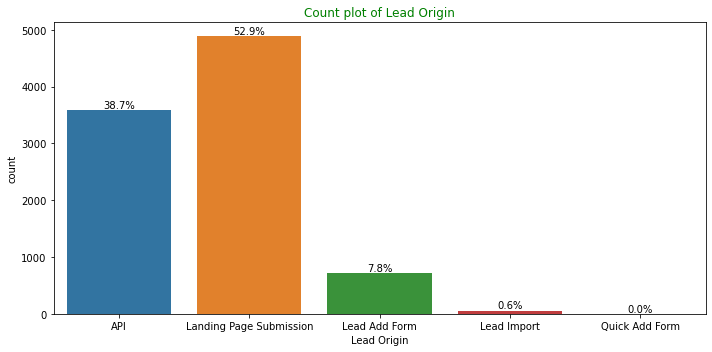

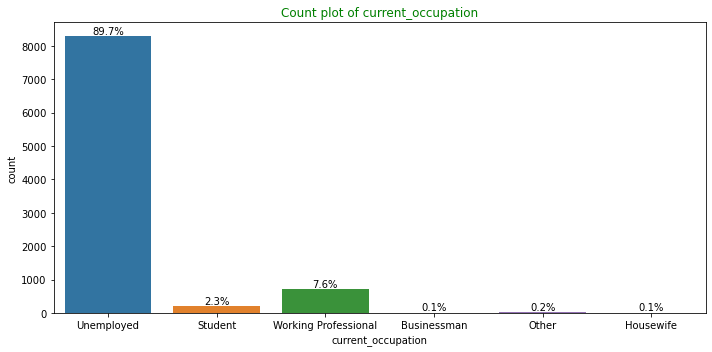

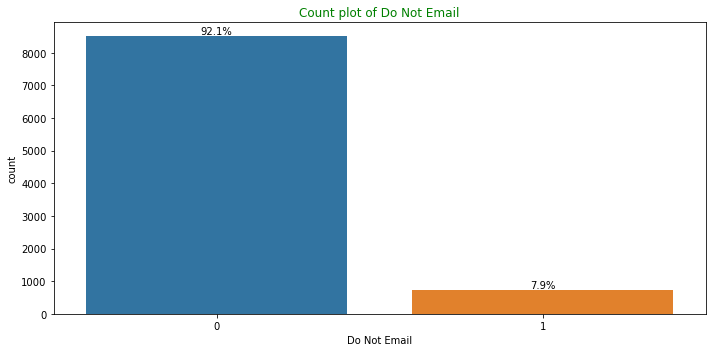

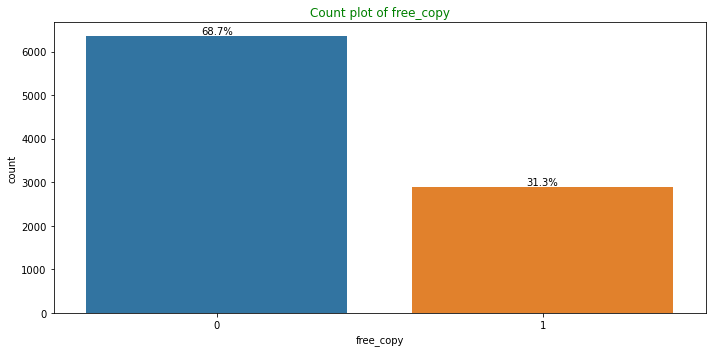

In [53]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leads_df)
    total=len(leads_df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        plt.tight_layout()
        

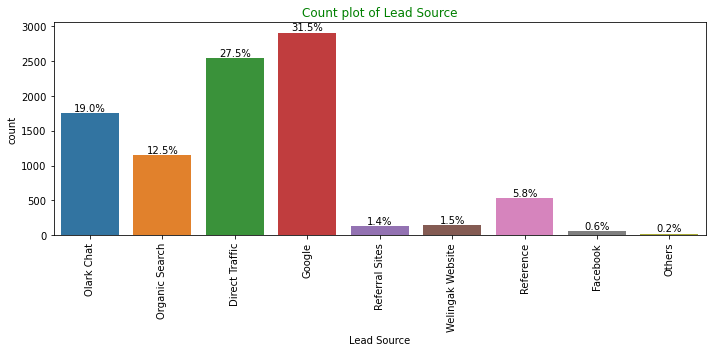

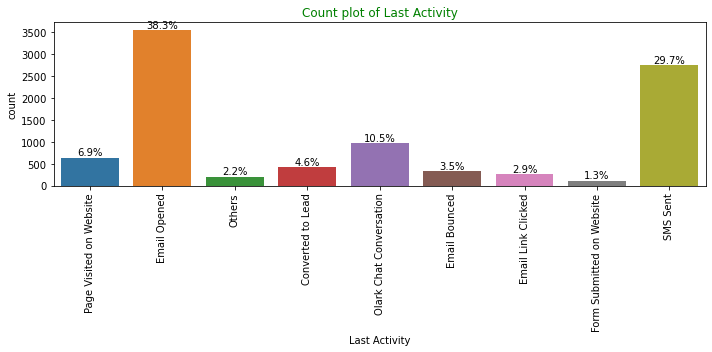

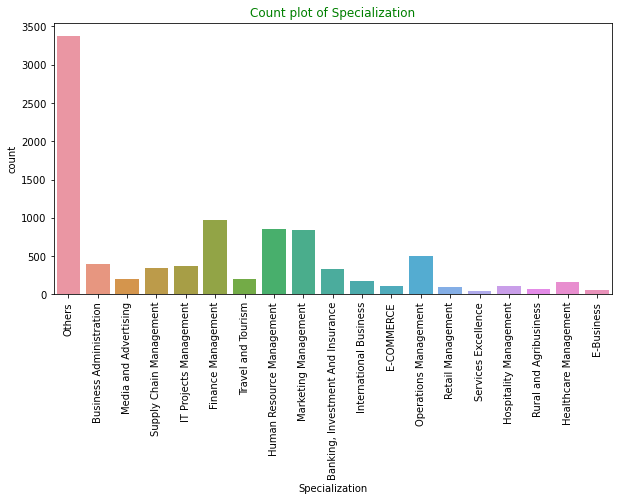

In [54]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leads_df)
    total=len(leads_df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
            plt.tight_layout()
    else:
        pass

<strong><span style="color:purple">Observations:</span></strong> 

- In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

- With this we get some understanding that which variables can be used in **Bivariate analysis**.

<hr/>
<strong><span style="color:purple">Insights Univariate:</span></strong>  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)** 

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 

- **Current_occupation:** It has 90% of the customers as Unemployed

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

<strong><span style="color:blue">NOTE:</span></strong> These insights will be helpful in further Bivariate Analysis.

<b><font color= green size =3>4.3 Bivariate Analysis </font></b>

<font color= green size =3>4.3.1 Bivariate Analysis for categorical variables </font>

In [55]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=leads_df,palette="prism_r",alpha=0.46)
    
    total=len(leads_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="YlGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
            plt.tight_layout()


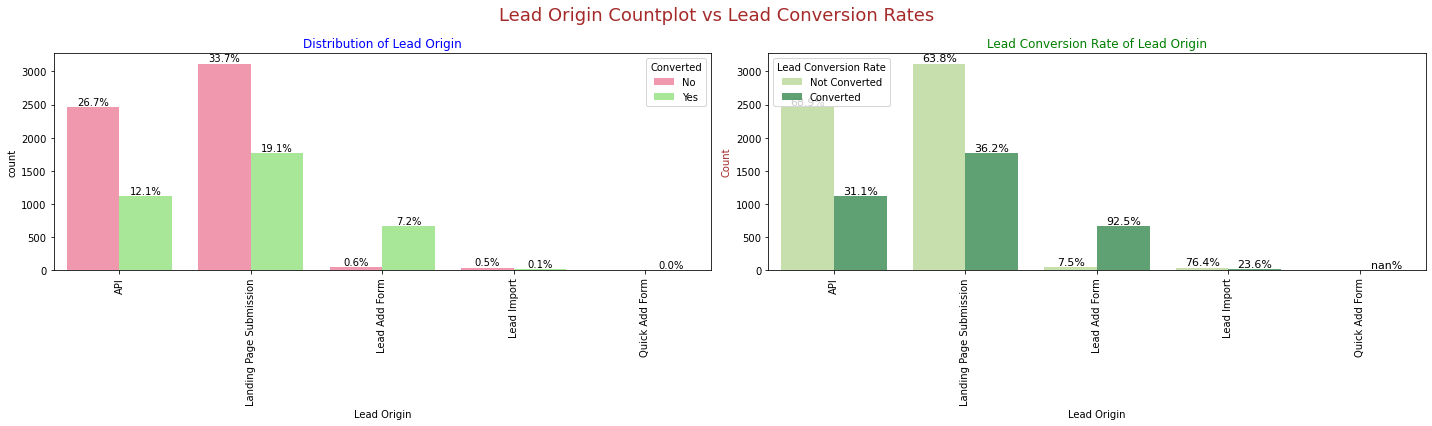

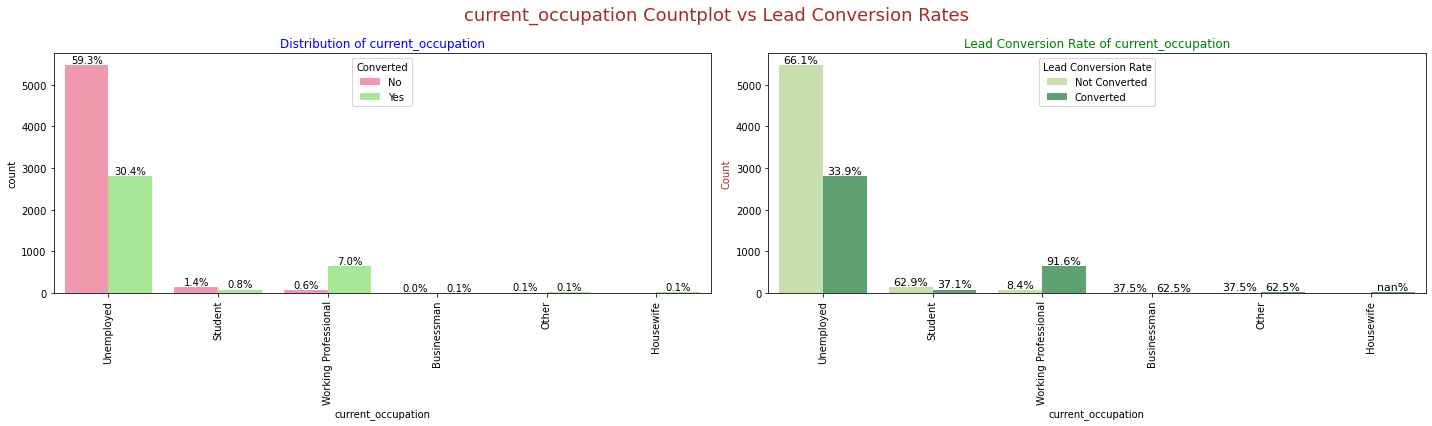

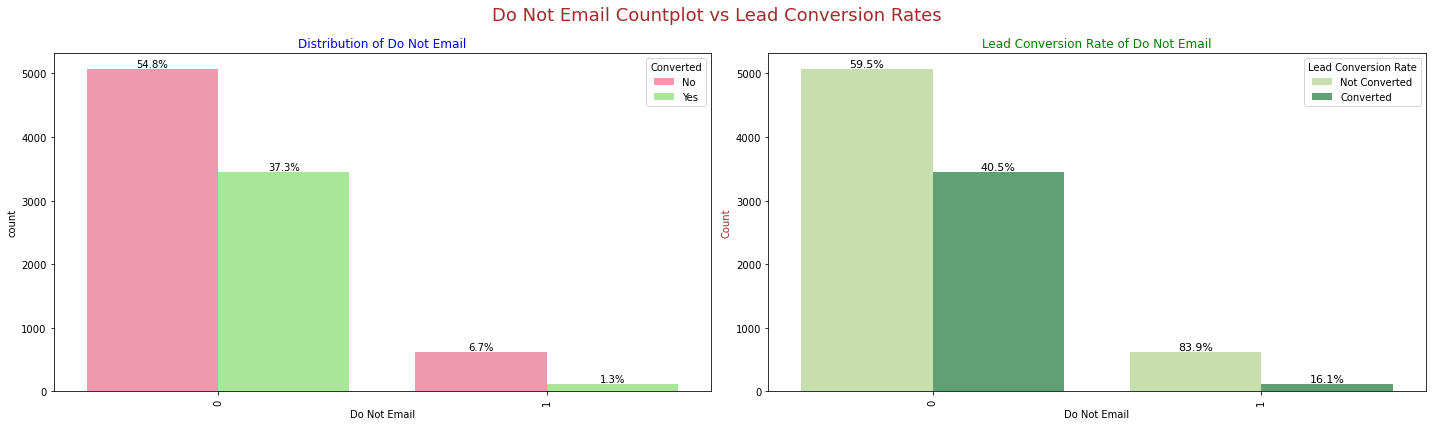

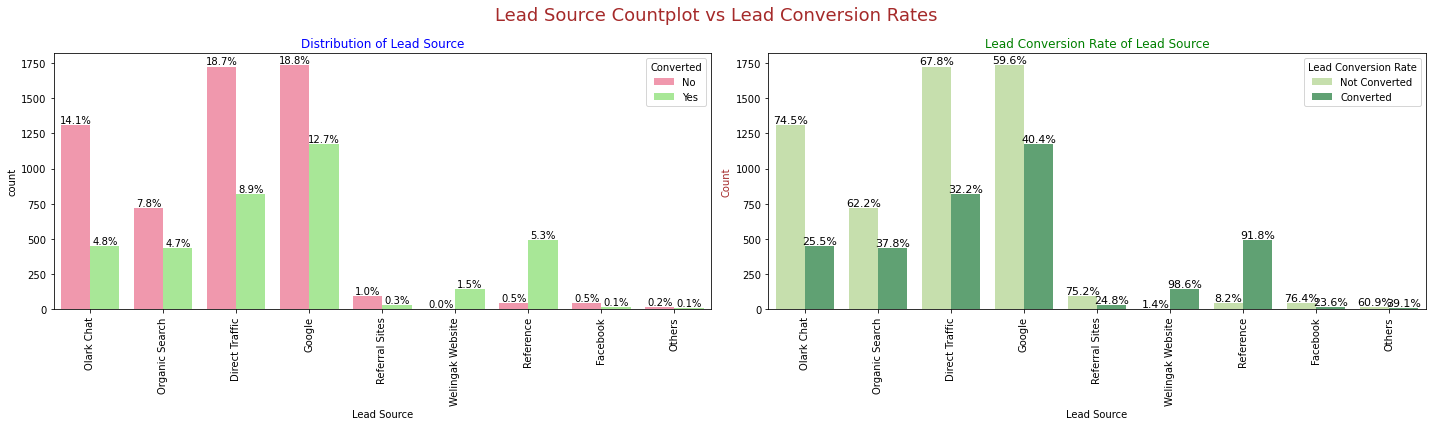

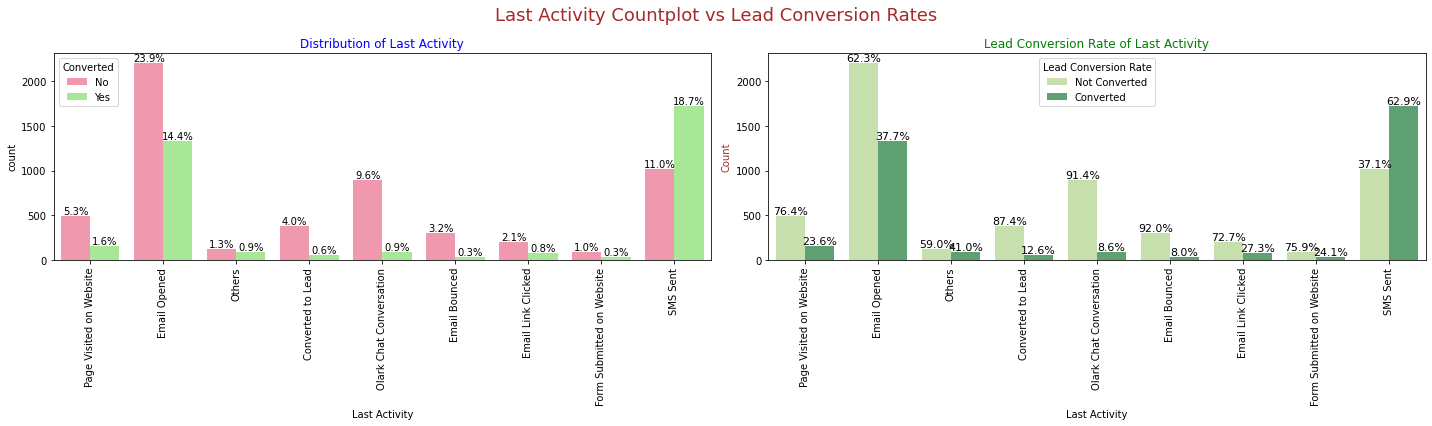

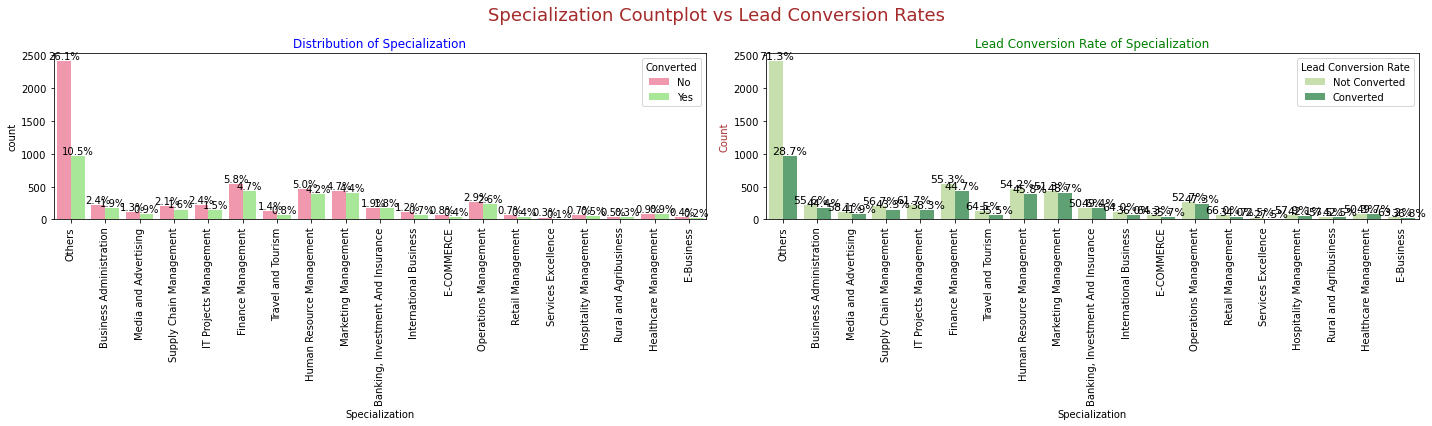

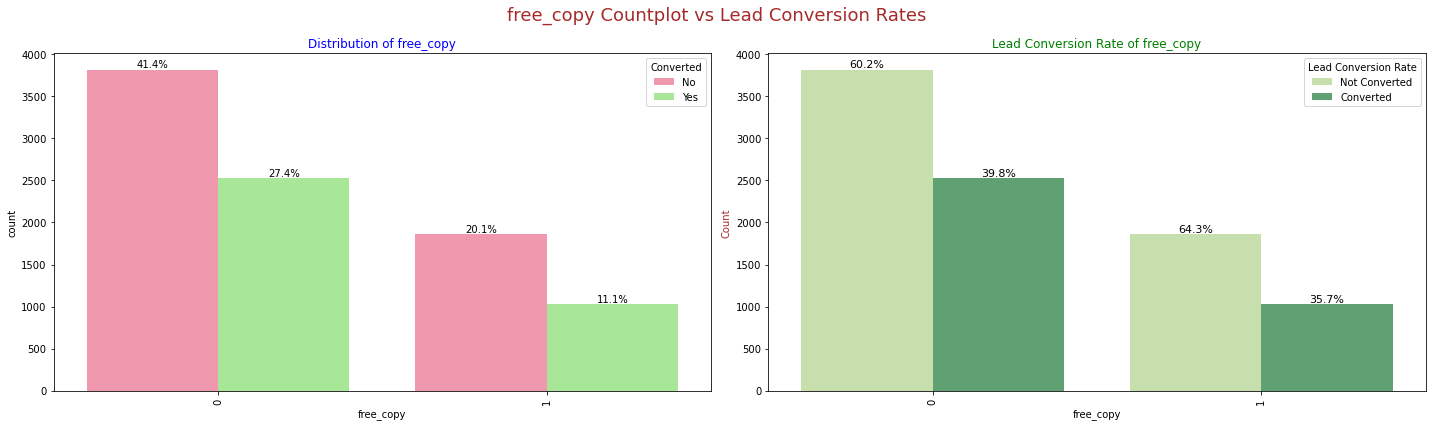

In [56]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","free_copy"]

for i in cat_cols:
    Bivariate_cat(leads_df,variable_name=i)
    

<strong><span style="color:purple">Insights:</span></strong> 

- <strong><span style="color:Green">Lead Origin:</span></strong> Around 52% of all leads originated from _"Landing Page Submission"_ with a **lead conversion rate (LCR) of 36%**.The _"API"_ identified approximately 39% of customers with a **lead conversion rate (LCR) of 31%**.

- <strong><span style="color:Green">current_occupation:</span></strong> Around 90% of the customers are _Unemployed_ with **lead conversion rate (LCR) of 34%**. While _Working Professional_ contribute only 7.6% of total customers with almost **92% lead conversion rate (LCR)**.

- <strong><span style="color:Green">Do Not Email:</span></strong> 92% of the people has opted that they dont want to be emailed about the course. 

<strong><span style="color:Blue">Note:</span></strong> We have assumed **LCR** as **Lead Conversion Rate** in short form.
<hr/>

- <strong><span style="color:Green">Lead Source:</span></strong> _Google_ has **LCR of 40%** out of 31% customers , _Direct Traffic_ contributes **32% LCR** with 27% customers which is lower than Google,_Organic Search_ also gives **37.8% of LCR** but the contribution is by only 12.5% of customers ,_Reference_ has **LCR of 91%** but there are only around 6% of customers through this Lead Source.

- <strong><span style="color:Green">Last Activity:</span></strong> _'SMS Sent'_ has **high lead conversion rate of 63%** with 30% contribution from last activities, _'Email Opened'_ activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

- <strong><span style="color:Green">Specialization:</span></strong> Marketing Managemt,HR Management,Finance Management shows good contribution.

<font color= green size =3>4.3.1 Bivariate Analysis for numerical variables </font>

<Figure size 1440x720 with 0 Axes>

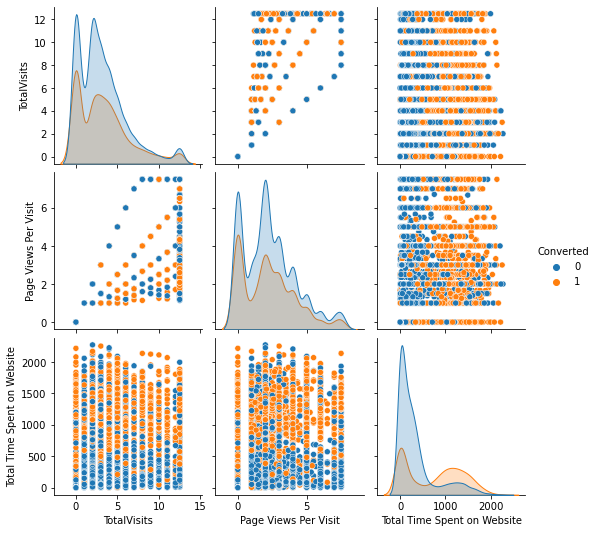

In [57]:
plt.figure(figsize=(20, 10))
sns.pairplot(data=leads_df,vars=num_cols,hue="Converted")                                  
plt.show()

In [58]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

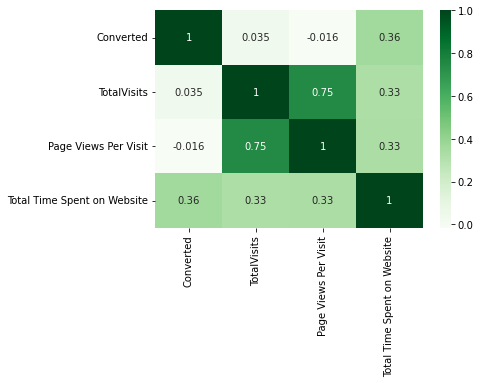

In [59]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=leads_df[num_cols].corr(),cmap="Greens",annot=True)
plt.show()

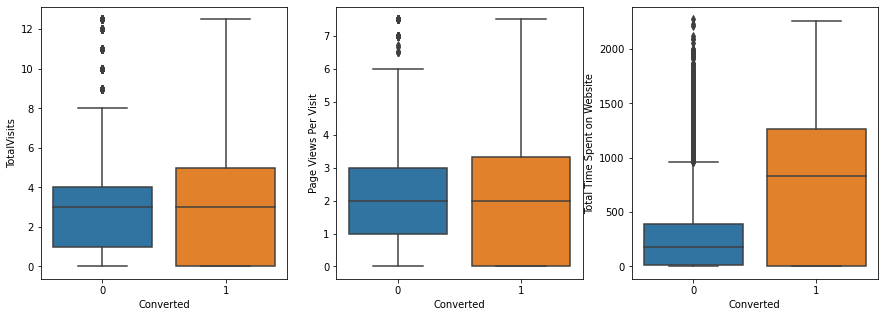

In [60]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

<strong><span style="color:purple">Insights:</span></strong> 
- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

<b><font color= blue size =4>Step 5: Data Analysis</font></b>

<b><font color= green size =3>5.1 Dummy Variables </font></b>

For categorical variables with multiple levels, create dummy features using one hot encoding

In [61]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_occupation,free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [62]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads_df[["Lead Origin","Lead Source","Last Activity","Specialization","current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [63]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [64]:
# We have created dummies for the below variables, so we can drop them

leads_df = leads_df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","current_occupation"],1)

In [65]:
leads_df.shape

(9240, 49)

In [66]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

<b><font color= blue size =4>Step 6: Train test split for ML</font></b>

In [67]:
# Putting predictor variables to X
X = leads_df.drop('Converted', axis=1)

# Putting Target variables to y
y = leads_df["Converted"]

In [68]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [70]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


<b><font color= blue size =4>Step 7: Feature Scaling</font></b>

In [71]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [72]:
# X-train dataframe after standard scaling
round(X_train.head(),4)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,current_occupation_Housewife,current_occupation_Other,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional
1871,-0.2916,-1.0650,-0.8854,-1.1849,-0.6732,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.2916,0.2624,0.0057,-0.4887,1.4855,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.2916,0.5942,-0.6914,0.1237,-0.6732,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.2916,0.5942,1.3652,1.4323,-0.6732,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.2916,-1.0650,-0.8854,-1.1849,-0.6732,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
round(LCR,4)

38.539

We have 38.5% Conversion Rate

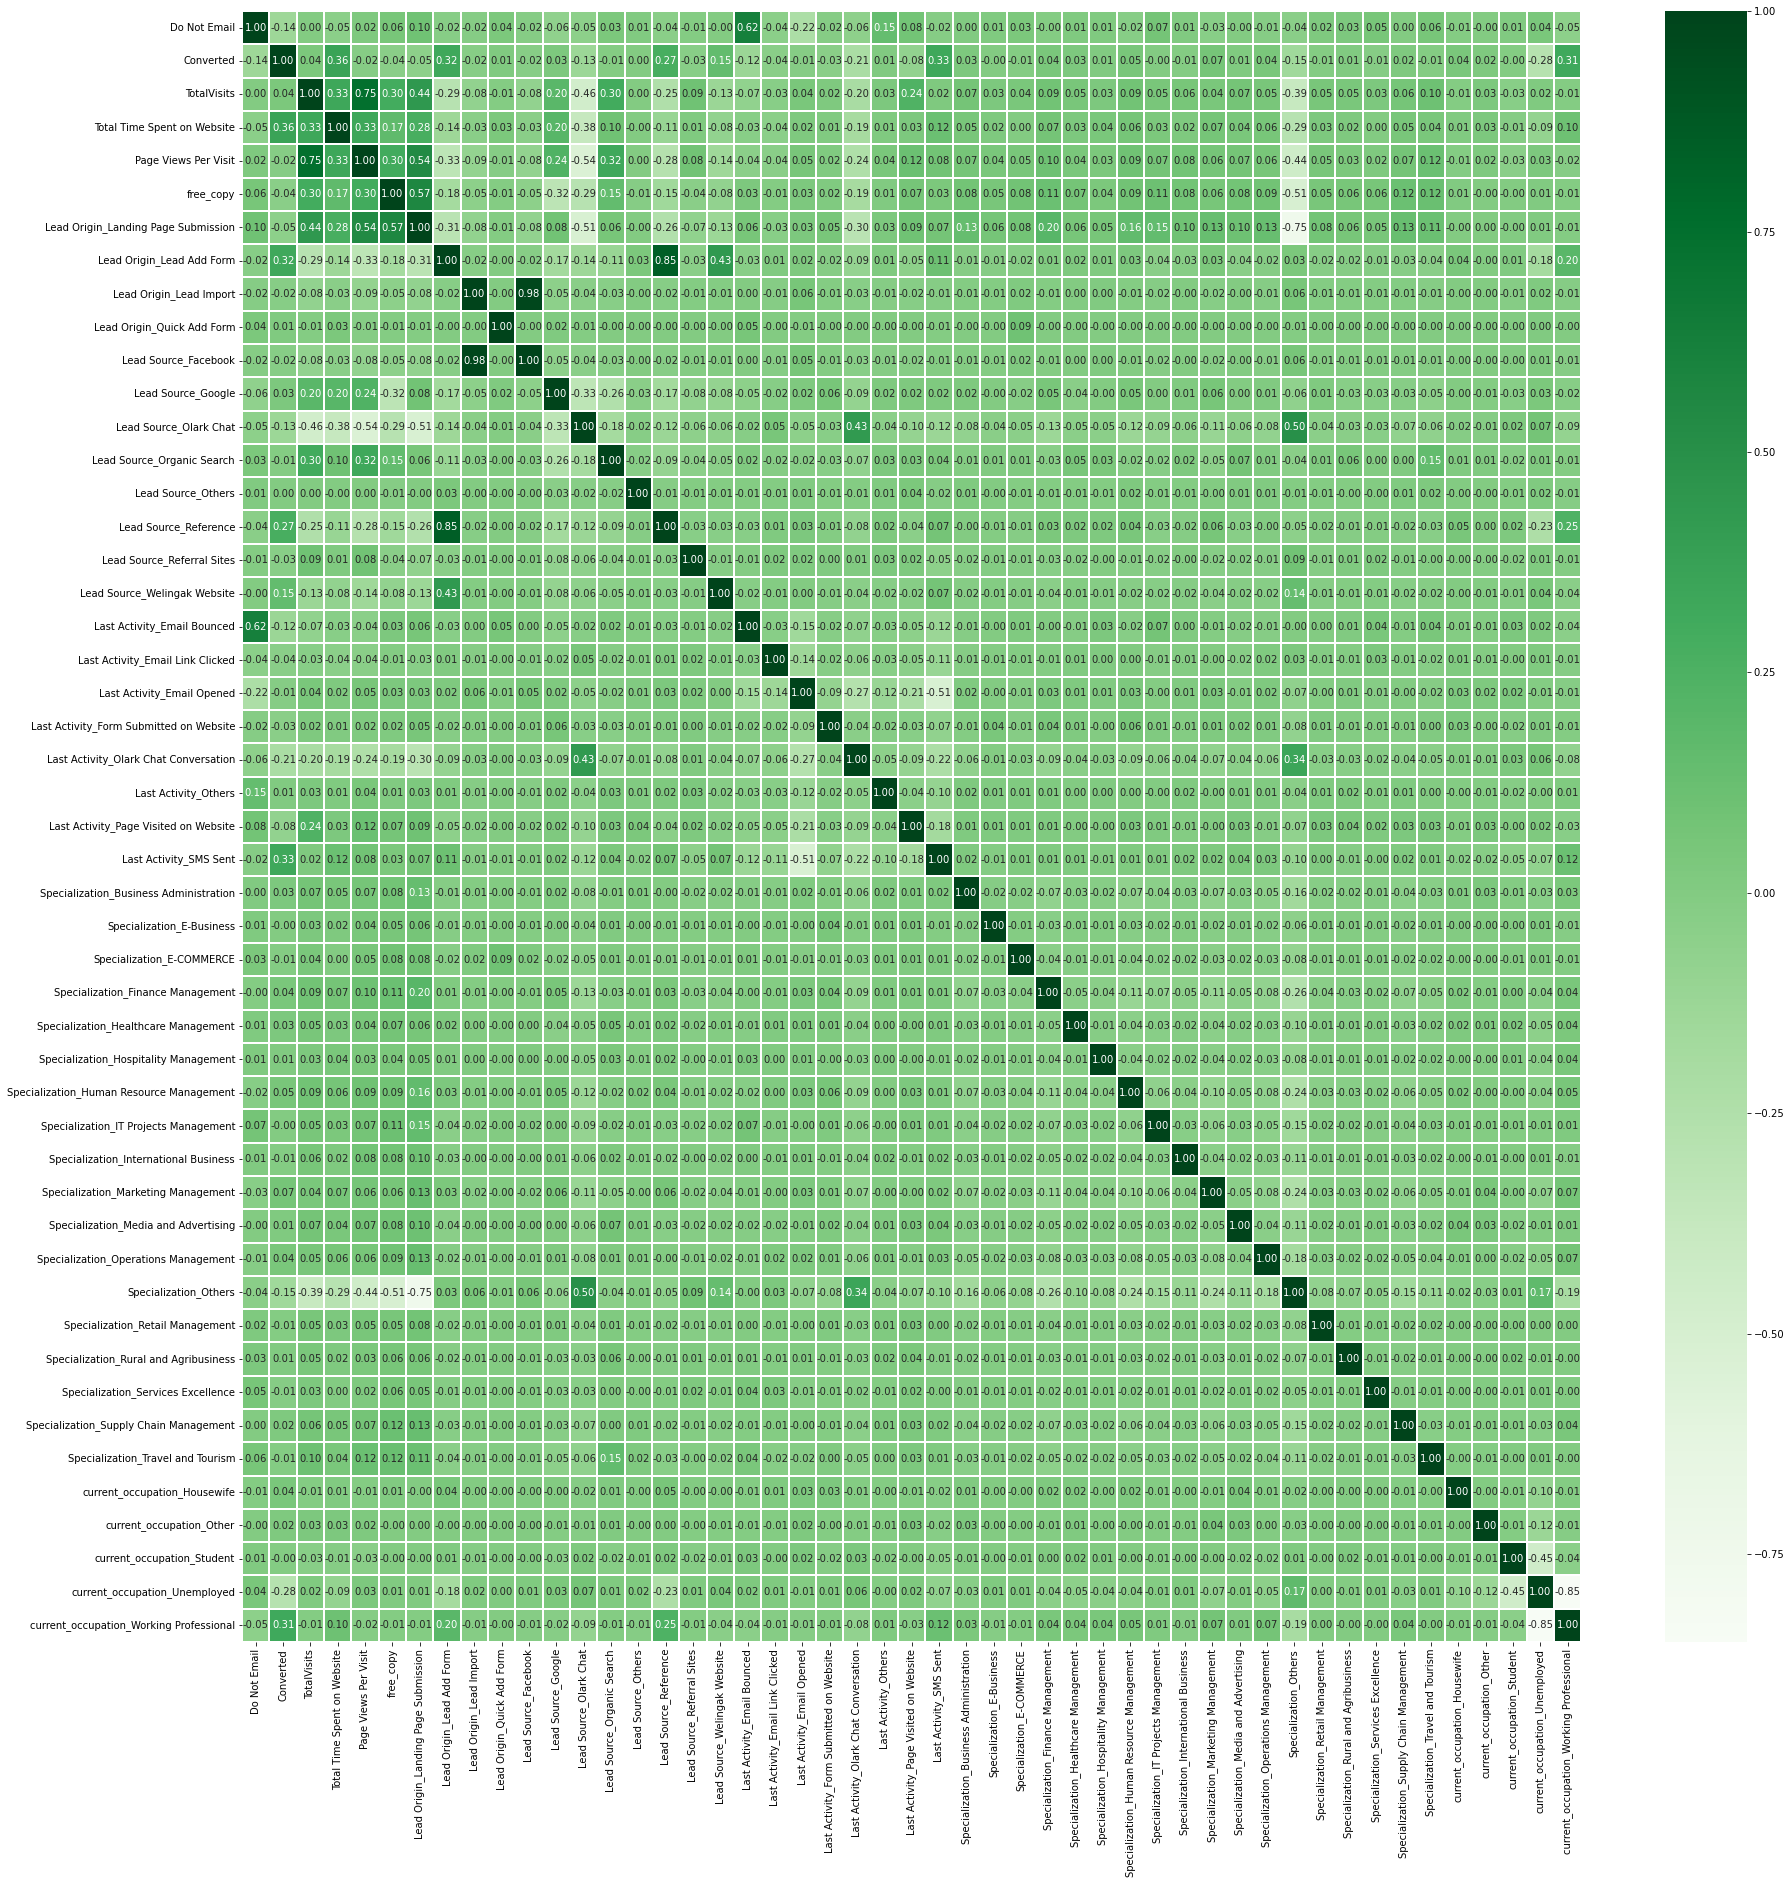

In [74]:
# analyse correlation matrix
plt.figure(figsize = (30,30))        
sns.heatmap(leads_df.corr(),linewidths=0.01,cmap="Greens",fmt='.2f',annot=True)
plt.show()

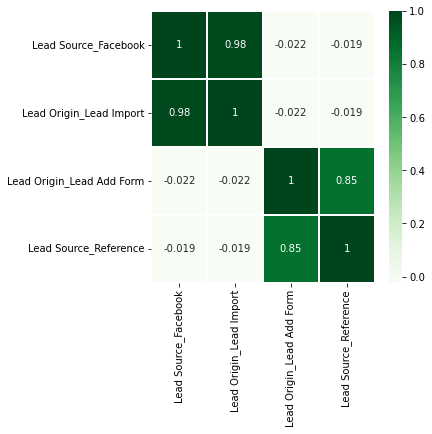

In [75]:
# as the above heatmap has so many columns lets breakdown suspected variables which might have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(leads_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Greens",annot=True)
plt.show()

<strong><span style="color:Blue">Note:</span></strong> These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.

In [76]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

<b><font color= blue size =4>Step 8: Building the Model</font></b>

- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE: Recursive Feature Elimination (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

<b><font color= green size =3>8.1 Feature selection using RFE </font></b>

In [77]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [78]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [79]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [80]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'current_occupation_Housewife',
       'current_occupation_Working Professional'],
      dtype='object')

In [81]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [82]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [83]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

round(logm1.params,4)

const                                      -1.0333
Total Time Spent on Website                 1.0505
Lead Origin_Landing Page Submission        -1.2721
Lead Source_Facebook                       -0.6961
Lead Source_Olark Chat                      0.9001
Lead Source_Others                          0.9807
Lead Source_Reference                       2.8977
Lead Source_Welingak Website                5.3802
Last Activity_Email Opened                  0.9506
Last Activity_Olark Chat Conversation      -0.5534
Last Activity_Others                        1.2580
Last Activity_SMS Sent                      2.0688
Specialization_Hospitality Management      -1.0720
Specialization_Others                      -1.1937
current_occupation_Housewife               23.0222
current_occupation_Working Professional     2.6855
dtype: float64

In [84]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 21 Mar 2023   Deviance:                       5465.5
Time:                        23:51:55   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE : </span></strong> "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2

In [85]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("current_occupation_Housewife")

In [86]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

round(logm2.params,4)

const                                     -1.0251
Total Time Spent on Website                1.0494
Lead Origin_Landing Page Submission       -1.2674
Lead Source_Facebook                      -0.6969
Lead Source_Olark Chat                     0.8991
Lead Source_Others                         0.9739
Lead Source_Reference                      2.9171
Lead Source_Welingak Website               5.3791
Last Activity_Email Opened                 0.9490
Last Activity_Olark Chat Conversation     -0.5583
Last Activity_Others                       1.2482
Last Activity_SMS Sent                     2.0588
Specialization_Hospitality Management     -1.0795
Specialization_Others                     -1.1978
current_occupation_Working Professional    2.6773
dtype: float64

In [87]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 21 Mar 2023   Deviance:                       5480.7
Time:                        23:51:55   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong> "Lead Source_Facebook" column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

### Model 3

In [88]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [89]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

round(logm3.params,4)

const                                     -1.0405
Total Time Spent on Website                1.0518
Lead Origin_Landing Page Submission       -1.2493
Lead Source_Olark Chat                     0.9169
Lead Source_Others                         0.9814
Lead Source_Reference                      2.9372
Lead Source_Welingak Website               5.3967
Last Activity_Email Opened                 0.9434
Last Activity_Olark Chat Conversation     -0.5582
Last Activity_Others                       1.2487
Last Activity_SMS Sent                     2.0555
Specialization_Hospitality Management     -1.0904
Specialization_Others                     -1.1943
current_occupation_Working Professional    2.6757
dtype: float64

In [90]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 21 Mar 2023   Deviance:                       5482.6
Time:                        23:51:55   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong> "Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

### Model 4

In [91]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [92]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

round(logm4.params,4)

const                                     -1.0236
Total Time Spent on Website                1.0498
Lead Origin_Landing Page Submission       -1.2590
Lead Source_Olark Chat                     0.9072
Lead Source_Reference                      2.9253
Lead Source_Welingak Website               5.3887
Last Activity_Email Opened                 0.9421
Last Activity_Olark Chat Conversation     -0.5556
Last Activity_Others                       1.2531
Last Activity_SMS Sent                     2.0519
Specialization_Hospitality Management     -1.0944
Specialization_Others                     -1.2033
current_occupation_Working Professional    2.6697
dtype: float64

In [93]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 21 Mar 2023   Deviance:                       5486.1
Time:                        23:51:55   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong>  Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [94]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


<strong><span style="color:Blue">NOTE:</span></strong> No variable needs to be dropped as they all have good VIF values less than 5.
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 4 for `Model Evaluation`.

<b><font color= blue size =4>Step 9: Model Evaluation</font></b>

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [95]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [96]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [97]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
round(y_train_pred_final.head(),4)

# y_train.values actual Converted values from leads_df dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.4741,1871
1,0,0.0733,6795
2,0,0.2491,3516
3,0,0.7690,8105
4,0,0.2130,3934


<strong><span style="color:Blue">NOTE:</span></strong> Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [98]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
round(y_train_pred_final.head(),4)

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.4741,1871,0
1,0,0.0733,6795,0
2,0,0.2491,3516,0
3,0,0.7690,8105,1
4,0,0.2130,3934,0


<b><font color= green size =3>9.1 Confusion Matrix </font></b>

In [99]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


<b><font color= green size =3>9.2 Accuracy </font></b>

In [100]:
# Checking the overall accuracy.
print(round(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]),4))

0.8052


<b><font color= green size =3>9.3 Other Metrics </font></b>

- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",round(TP / float(TP+FN),4))

Sensitivity : 0.6569


In [103]:
# Let us calculate specificity
print("Specificity :",round(TN / float(TN+FP),4))

Specificity : 0.8966


In [104]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print("False Positive Rate:",round(FP/ float(TN+FP),4))

False Positive Rate: 0.1034


In [105]:
# positive predictive value 
print("positive predictive value:",round(TP / float(TP+FP),4))

positive predictive value: 0.7965


In [106]:
# Negative predictive value
print("Negative predictive value",round(TN / float(TN+ FN),4))

Negative predictive value 0.8092


<b><font color= green size =3>9.4 ROC Curve </font></b>

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [107]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

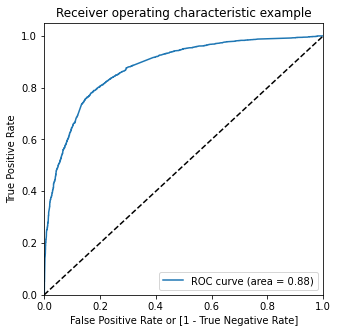

In [109]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<font color= green size =3>9.4.1 Find the optimal cutoff point </font>

i.e., probability where we get `balanced sensitivity and specificity`

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
round(y_train_pred_final.head(),4)

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.4741,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.0733,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.2491,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.7690,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.2130,3934,0,1,1,1,0,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(round(cutoff_df,4))

     prob  accuracy   sensi   speci
0.0   0.0    0.3813  1.0000  0.0000
0.1   0.1    0.5957  0.9736  0.3628
0.2   0.2    0.7212  0.9201  0.5987
0.3   0.3    0.7913  0.8329  0.7656
0.4   0.4    0.8137  0.7636  0.8446
0.5   0.5    0.8052  0.6569  0.8966
0.6   0.6    0.7930  0.5860  0.9205
0.7   0.7    0.7791  0.5077  0.9463
0.8   0.8    0.7540  0.4055  0.9688
0.9   0.9    0.7078  0.2474  0.9915


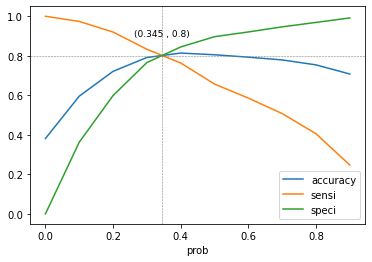

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE:</span></strong> 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


<b><font color= green size =3>9.5 Metrics of Train data </font></b>

In [114]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8045763760049475


In [115]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [116]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


************************************************** 



<b><font color= green size =3>9.6 Precision and Recall Trade-off </font></b>

Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [117]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

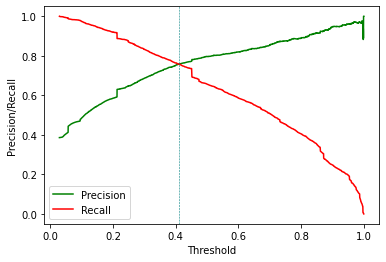

In [118]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Blue">NOTE:</span></strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [119]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [120]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,1
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,1
4,0,0.212973,3934,0,0


In [121]:
# Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3406  596]
 [ 596 1870]] 

************************************************** 

True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positve                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489


************************************************** 



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### Adding `Lead Score` to Training dataframe

- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [122]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.474082,1871,1,47
1,0,0.073252,6795,0,7
2,0,0.249087,3516,0,25
3,0,0.768973,8105,1,77
4,0,0.212973,3934,0,21


<b><font color= blue size =4>Step 10: Prediction on Test set</font></b>

<b><font color= green size =3>10.1 Scaling </font></b>

In [123]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [124]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


<b><font color= green size =3>10.2 Prediction on Test set using Model 4 </font></b>

In [125]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [126]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [127]:
# top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [128]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [130]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [131]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [132]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


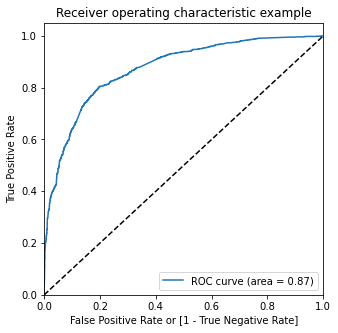

In [133]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

Area under ROC curve is 0.87 out of 1 which indicates a good predictive model
- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

<b><font color= green size =3>10.3 Test Set Model Evaluation </font></b>

In [134]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1353  324]
 [ 221  874]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `For Test set`
    - Accuracy : 80.34%
    - Sensitivity : 79.82% ≈ 80%
    - Specificity : 80.68%
    
These matrics are very close to train set, so our final model logm4 is  performing with good predictability on both Train & Test set

In [135]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

#### Adding `Lead Score` feature to Test df

In [136]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

<b><font color= blue size =4>Conclusion</font></b>

<b><font color= green size =3>Train dataset </font></b>

- Accuracy: 80.46%

- Sensitivity: 80.05%

- Specificity: 80.71%

<b><font color= green size =3>Test dataset </font></b>

- Accuracy: 80.34%

- Sensitivity: 79.82%

- Specificity: 80.68%

<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 80.05%` in the train set and 79.82% in the test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.
<hr/>

<b><font color= green size =3>Model Parameters </font></b>

- The final Logistic Regression Model has 12 features

<strong><span style="color:purple">`Top 3 features` that contributing `positively` to predicting hot leads in the model are:</span></strong> 
- Lead Source_Welingak Website

- Lead Source_Reference

- Current_occupation_Working Professional

<strong><span style="color:Blue">NOTE: </span></strong> The Optimal cutoff probability point is 0.345.Converted probability greater than 0.345 will be predicted as Converted lead (Hot lead) & probability smaller than 0.345 will be predicted as not Converted lead (Cold lead).
<hr/>

<b><font color= green size =3>Recommendations </font></b>

<strong><span style="color:purple">To increase our Lead Conversion Rates: </span></strong>  

- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too. 


<strong><span style="color:purple">To identify areas of improvement: </span></strong>  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.